# Metodos Numericos 
# Clase 1 (21/04/2025)
## Conceptos clave

**Modelar:** Describir, abstraer caracteristicas de un problema

**Simular:** Experimentacion con datos o caracteristicas

**Emular:** Imitar ambos escenarios

## Metodos Analiticos
Manejo de grandes datos; Solucion exacta y conocida. Ejemplo:



In [24]:
import sympy as sp

x = sp.symbols('x')
ecuacion = x**2 - 4
solucion = sp.solve(ecuacion, x)
print(solucion)


[-2, 2]


## Metodos Numericos
Soluciona expresiones matematicas; aproximada al error, sin solucion exacta

In [25]:
import sympy as sp
#Libreria usada solo para el ejemplo

x = sp.symbols('x')
integral = sp.integrate(sp.exp(-x**2), x)
print(integral)


sqrt(pi)*erf(x)/2


# Tipos de errores
## Error de corte o truncamiento: Un algoritmo con truncamiento fijo puede ser exacto pero no preciso si se implementa sin cuidado. 
Tomando el numero irracional raiz de 3 se realizara un truncamiento de 5 cifras significativas

In [26]:
import math
# Uso de la libreria math solo para ejemplo
num = math.sqrt(3)
num_truncado = float(f"{num:.4f}")
print(num_truncado)  


1.7321


## Error de redondeo: Un algoritmo con mucho redondeo puede ser preciso pero no exacto, un algortimo debe ser preciso y exacto.


In [27]:
import math

num = math.sqrt(3)
num_redondeado = round(num, 4)
print(num_redondeado)  


1.7321


## Representacion Numerica: Como una computadora almacena y maneja numeros usando bits


In [28]:
def punto_flotante(signo, exponente, fraccion_binaria):
    #Codigo usado solo para este ejemplo de la clase 1
    
    # Calculamos el sesgo del exponente
    sesgo = 127
    exponente_real = exponente - sesgo

    # Calculamos el valor de la mantisa (1 + fracción binaria)
    mantisa = 1 + fraccion_binaria

    # Calculamos el valor final de X
    valor = ((-1) ** signo) * (2 ** exponente_real) * mantisa
    return valor

#Ejemplo
signo = 0
exponente = 130
fraccion_binaria = 0.375  # 0.011 en binario
resultado = punto_flotante(signo, exponente, fraccion_binaria)

print(f"El valor representado es: {resultado}")


El valor representado es: 11.0


# Calculo de error
## Error real

In [29]:
import math

def calcular_error_real(valor_real, valor_aproximado):

    error_real = valor_real - valor_aproximado
    return error_real

# Usando √3
valor_real = math.sqrt(3)  # Valor exacto
valor_aproximado = 1.7321  # Valor aproximado con 4 decimales

error_real = calcular_error_real(valor_real, valor_aproximado)
print(f"Valor real: {valor_real}")
print(f"Valor aproximado: {valor_aproximado}")
print(f"Error real: {error_real}")


Valor real: 1.7320508075688772
Valor aproximado: 1.7321
Error real: -4.919243112277982e-05


## Error absoluto

In [30]:
import math

def calcular_error_absoluto(valor_real, valor_aproximado):
    error_absoluto = abs(valor_real - valor_aproximado)
    return error_absoluto

#Usando √3
valor_real = math.sqrt(3)  # Valor exacto
valor_aproximado = 1.7321  # Valor aproximado con 4 decimales

error_absoluto = calcular_error_absoluto(valor_real, valor_aproximado)
print(f"Valor real: {valor_real}")
print(f"Valor aproximado: {valor_aproximado}")
print(f"Error absoluto: {error_absoluto}")

Valor real: 1.7320508075688772
Valor aproximado: 1.7321
Error absoluto: 4.919243112277982e-05


## Error relativo

In [31]:
import math

def calcular_error_relativo(valor_real, valor_aproximado):
    error_relativo = abs((valor_real - valor_aproximado) / valor_real) 
    return error_relativo

#Usando √3
valor_real = math.sqrt(3)  # Valor exacto
valor_aproximado = 1.7321  # Valor aproximado con 4 decimales

error_relativo = calcular_error_relativo(valor_real, valor_aproximado)
print(f"Valor real: {valor_real}")
print(f"Valor aproximado: {valor_aproximado}")
print(f"Error relativo: {error_relativo}")



Valor real: 1.7320508075688772
Valor aproximado: 1.7321
Error relativo: 2.8401263350829057e-05


## Error relativo porcentual


In [32]:
import math

def calcular_error_relativo_porcentual(valor_real, valor_aproximado):
    error_relativo_porcentual = abs((valor_real - valor_aproximado) / valor_real) * 100

    return error_relativo_porcentual

#Usando √3
valor_real = math.sqrt(3)  # Valor exacto
valor_aproximado = 1.7321  # Valor aproximado con 4 decimales

error_relativo_porcentual = calcular_error_relativo_porcentual(valor_real, valor_aproximado)
print(f"Valor real: {valor_real}")
print(f"Valor aproximado: {valor_aproximado}")
print(f"Error relativo: {error_relativo_porcentual} %")

Valor real: 1.7320508075688772
Valor aproximado: 1.7321
Error relativo: 0.0028401263350829055 %


# Clase 2 (22/04/2025)
## Representacion Numerica en 32bits: Consiste en la conversion de un binario a decimal y viceversa, se realizara el codigo ejemplo sin el uso de librerias y con el numero visto en clase 263.3 


In [33]:
def convertir_parte_entera(num_parte_entera):
    binario = ""
    while num_parte_entera > 0:
        binario = str(num_parte_entera % 2) + binario
        num_parte_entera //= 2
    return binario or "0"  # Devuelve cero si la parte entera es 0

def convertir_parte_decimal(num_parte_decimal):
    binario = ""
    for _ in range(23):  # Limitar a 23 bits para la parte decimal
        num_parte_decimal *= 2
        bit = int(num_parte_decimal)
        binario += str(bit)
        num_parte_decimal -= bit
        if num_parte_decimal == 0:
            break
    return binario

def a_ieee754(numero):
    signo = "0" if numero >= 0 else "1"
    abs_numero = abs(numero)

    parte_entera = int(abs_numero)
    parte_decimal = abs_numero - parte_entera

    binario_parte_entera = convertir_parte_entera(parte_entera)
    binario_parte_decimal = convertir_parte_decimal(parte_decimal)

    if parte_entera > 0:
        binario_normalizado = binario_parte_entera + binario_parte_decimal
        exponente = len(binario_parte_entera) - 1
    else:
        ceros_izquiera = binario_parte_decimal.find("1")
        binario_normalizado = binario_parte_decimal[ceros_izquiera + 1 :]
        exponente = -(ceros_izquiera + 1)

    exponente_sesgado = exponente + 127
    exponente_binario = f"{exponente_sesgado:08b}"  # 8 bits para el exponente

    mantisa = (binario_normalizado[1:24]).ljust(23, "0")  # 23 bits para la mantisa

    return signo + exponente_binario + mantisa

# Ejemplo de uso para el numero dado en clase:
numero = 263.3
ieee754 = a_ieee754(numero)
print(f"Representación IEEE 754 en 32 bits de {numero}: {ieee754}")
    

Representación IEEE 754 en 32 bits de 263.3: 01000011100000111010011001100110


## Representacion Numerica de 64 bits: Consiste en la conversion de un binario a decimal y viceversa, esto para mejorar la precision, se realizara el codigo ejemplo sin el uso de librerias y con el numero visto en clase 263.3 

In [34]:
def convertir_parte_entera(num):
    #Convierte la parte entera a binario
    return bin(int(num))[2:] if num != 0 else "0"

def convertir_parte_decimal(num, precision=52):
    """Convierte la parte decimal a binario con la precisión especificada"""
    binary = ""
    for _ in range(precision):
        num *= 2
        bit = int(num)
        binary += str(bit)
        num -= bit
        if num == 0:
            break
    return binary

def double_precision(numero):
    #Convierte un número a formato IEEE 754 de 64 bits
    # Signo (1 bit)
    signo = '0' if numero >= 0 else '1'
    abs_num = abs(numero)
    
    # Parte entera y decimal
    parte_entera = int(abs_num)
    parte_decimal = abs_num - parte_entera
    
    # Convertir a binario
    bin_entero = convertir_parte_entera(parte_entera)
    bin_decimal = convertir_parte_decimal(parte_decimal)
    
    # Normalización
    if parte_entera > 0:
        mantisa = bin_entero + bin_decimal
        exponente = len(bin_entero) - 1
    else:
        pos = bin_decimal.find('1')
        mantisa = bin_decimal[pos+1:] if pos != -1 else '0'
        exponente = -(pos + 1) if pos != -1 else 0
    
    # Exponente sesgado (11 bits, sesgo 1023)
    exp_sesgado = exponente + 1023
    exp_binario = f"{exp_sesgado:011b}"
    
    # Mantisa (52 bits)
    mantisa = (mantisa[:52]).ljust(52, '0')
    
    return signo + exp_binario + mantisa

# Ejemplo de uso
numero = 263.3
ieee754 = double_precision(numero)
print(f"Representación IEEE 754 (64 bits) de {numero}:")
print(f"Signo (1 bit): {ieee754[0]}")
print(f"Exponente (11 bits): {ieee754[1:12]}")
print(f"Mantisa (52 bits): {ieee754[12:]}")



Representación IEEE 754 (64 bits) de 263.3:
Signo (1 bit): 0
Exponente (11 bits): 10000000111
Mantisa (52 bits): 1000001110100110011001100110011001100110011001100110


## Aritmetica de digitos finitos de un computador
Consiste en la representacion en punto flotante y sus operaciones definidas: suma, resta, multiplicacion y division


In [35]:
def representacion_flotante(numero):
    if numero == 0:
        return 0.0
    # Convertir a representación de punto flotante
    while abs(numero) >= 1:
        numero /= 10
    return numero

def suma(num1, num2):
    resultado = num1 + num2
    return representacion_flotante(resultado)

def resta(num1, num2):
    resultado = num1 - num2
    return representacion_flotante(resultado)

def multiplicacion(num1, num2):
    resultado = num1 * num2
    return representacion_flotante(resultado)

def division(num1, num2):
    if num2 != 0:
        resultado = num1 / num2
        return representacion_flotante(resultado)
    else:
        raise ValueError("No se puede dividir entre cero")

def error_relativo_porcentual(valor_real, valor_aproximado):
    if valor_real == 0:
        raise ValueError("El valor real no puede ser cero para calcular el error relativo.")
    error = abs((valor_real - valor_aproximado) / valor_real) * 100
    return error

# Ejemplo con los numeros dados en la clase usando redondeo a 5 digitos
numero1 = 0.71429
numero1_real = 5/7
numero2 = 0.71425
numero2_real = 0.714251

# Convertir números a representación flotante
num1_fl = representacion_flotante(numero1)
num2_fl = representacion_flotante(numero2)

print(f"Números en punto flotante: Número 1 (fl): {num1_fl}, Número 2 (fl): {num2_fl}")
print(f"Suma: {suma(num1_fl, num2_fl)}")
print(f"Resta: {resta(num1_fl, num2_fl)}")
print(f"Multiplicación: {multiplicacion(num1_fl, num2_fl)}")
print(f"División: {division(num1_fl, num2_fl)}")

# Realizar la resta aproximada
resta_aprox = resta(num1_fl, num2_fl)

# Calcular error relativo porcentual con los valores reales
valor_real = numero1_real - numero2_real 
error_relativo = error_relativo_porcentual(valor_real, resta_aprox)

# Resultados tal como se vio en clase
print(f"Resta real: {valor_real}")
print(f"Resta Aprox: {resta_aprox}")
print(f"Error relativo porcentual de la suma: {error_relativo}%")

Números en punto flotante: Número 1 (fl): 0.71429, Número 2 (fl): 0.71425
Suma: 0.14285399999999998
Resta: 3.999999999992898e-05
Multiplicación: 0.5101816325
División: 0.100005600280014
Resta real: 3.471428571433233e-05
Resta Aprox: 3.999999999992898e-05
Error relativo porcentual de la suma: 15.22633744820037%


## Convergencia, Divergencia y Tolerancia
**Convergencia:** Si al aumentar el numero de iteracion, los resultados se acercan cada vez mas a la solucion exacta

**Diverge:** Si los resultados se alejan indefinidamente o no se estabilizan.

**Tolerancia:** Es el limite aceptable del error que se impone para detener el metodo cuando se alcanza una solucion suficientemente buena, para ello se usa criterio de parada.

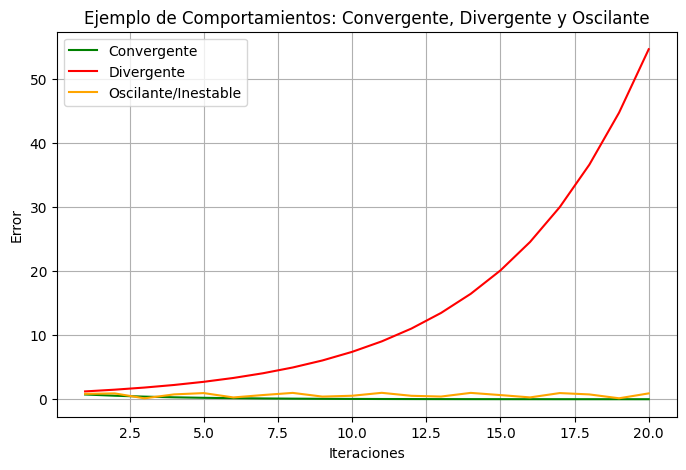

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Generar el eje x (iteraciones)
iteraciones = np.linspace(1, 20, 20)

# Ejemplos de funciones para cada comportamiento
def convergente(x):
    return np.exp(-0.3 * x)

def divergente(x):
    return np.exp(0.2 * x)

def oscilante(x):
    return np.abs(np.sin(x))

# Calcular valores
y_convergente = convergente(iteraciones)
y_divergente = divergente(iteraciones)
y_oscilante = oscilante(iteraciones)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(iteraciones, y_convergente, label="Convergente", color="green")
plt.plot(iteraciones, y_divergente, label="Divergente", color="red")
plt.plot(iteraciones, y_oscilante, label="Oscilante/Inestable", color="orange")

# Personalización
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Ejemplo de Comportamientos: Convergente, Divergente y Oscilante")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()




## Criterios de parada

Lo utilizamos en algoritmos para evitar lazos infinitos

1. **Número de iteraciones**: $i < K$.
2. **Error absoluto**: $|x_{\text{nuevo}} - x_{\text{anterior}}| < \epsilon_{\text{abs}}$.
3. **Error relativo**: $\frac{|x_{\text{nuevo}} - x_{\text{anterior}}|}{|x_{\text{nuevo}}|} < \epsilon_{\text{rel}}$.
4. **Valor de la función**: $|f(x)| < \epsilon_{\text{func}}$.
5. **Tiempo máximo**: $t < T$.

In [37]:
import time

def metodo_newton_raphson(N, max_iteraciones=100, abs_tolerancia=1e-6, rel_tolerancia=1e-6, func_tolerancia=1e-6, tiempo_max=5):
    
    # Definición de la función f(x) = x^2 - N y su derivada f'(x) = 2x
    def f(x):
        return x**2 - N

    def f_prime(x):
        return 2 * x

    # Inicialización
    x = N / 2.0  # Suposición inicial
    start_time = time.time()
    
    for i in range(1, max_iteraciones + 1):
        # Evaluar función y derivada
        fx = f(x)
        fpx = f_prime(x)
        
        # Actualización de Newton-Raphson
        x_nueva = x - fx / fpx
        
        # Calcular errores
        abs_error = abs(x_nueva - x)
        rel_error = abs_error / abs(x_nueva)
        
        # Criterios de parada
        if abs_error < abs_tolerancia:
            print(f"Converge con error absoluto en la iteracion {i}.")
            break
        if rel_error < rel_tolerancia:
            print(f"Converge con error relativo en la iteracion{i}.")
            break
        if abs(fx) < func_tolerancia:
            print(f"Converge en el valor de la funcion en la iteracion {i}.")
            break
        if time.time() - start_time > tiempo_max:
            print(f"Parada por limite de tiempo en la iteracion{i}.")
            break

        # Actualizar x
        x = x_nueva

    else:
        print("Parada por maximo de iteraciones.")
    
    return x

#USO CON UN NUMERO CON RAIZ CUADRADA 
N = 25  
resultado = metodo_newton_raphson(N)
print(f"Resultado: {resultado}")


Converge con error absoluto en la iteracion 6.
Resultado: 5.000000000016778


# Clase 3 (29/04/2025)

## Soluciones de sistemas de ecuacions no lineales

## Raices de una ecuacion
La raiz x es la solucion de una ecuacion f de la forma f(x)=0, conocida como solucion o cero

## Teorema del valor intermedio
Si $f \in C[a,b]$ y $K$ es cualquier número entre $f(a)$ y $f(b)$, entonces existe un número $c$ en $(a,b)$ para el cual $f(c) = K$.


## Busqueda de cambio de signo
Un intervalo [a,b], la funcion $f(x)$ toma valores de diferente signo en los extemos de la siguiente forma:

Si $f(p) \cdot f(a) < 0 ;$ la raiz esta en $[a,p]$

Si $f(p) \cdot f(b) < 0 ;$ la raiz esta en $[p,b]$

## Metodo de la Biseccion
Suponga que $f \in C[a,b]$ y $f(a) \cdot f(b)$, el metodo de biseccion genera una sucesion que se aproxima a cero p de f con:

$|p_n - p| \leq \frac{b-a}{2^n}, \quad \text{cuando } n \geq 1$

## Pasos para un buen metodo de biseccion

**Paso 1:** Punto medio

**Paso 2:** Evaluar los resultados de las funciones

**Paso 3** Determinar el nuevo intervalo

**Paso 4:** Calcule el error(criterio de parada)

**Paso 5:** Volver al paso 1

## Numero de iteracion dada por:

$n \geq \log_2 \left(\frac{b-a}{|p_n - p|} \right), \quad \text{cuando } |p_n - p| > 0$

## Razon de convergencia:
$O (\frac{1}{2^n})$

$p_n = p + O (1/2^n)$

## Funcion signum
Es una buena practica para no almacenar los valores:
$$
sgn(x) =
\begin{cases} 
-1, & \text{si } x < 0 \\
0, & \text{si } x \geq 0 \\
1, & \text{si } x > 0
\end{cases}
$$

$sgn(f(a_n)sgn(f(p_n))) < 0 $ en lugar de $f(a_n)f(p_n) <0$





Tomando el ejemplo de la clase se hara el ejemplo con:

$f(x) = x^3 + 4x^2 - 10; [1,2] \quad \text {con precision de } 10^{-1} $

In [38]:
from math import sin, tan, exp
def signum(x):
    #Devuelve el signo de un número: '-', '0' o '+'
    if x > 0:
        return '+'
    elif x < 0:
        return '-'
    return '0'

def metodo_biseccion(funcion, a, b, tol, max_iteraciones):
    # Verificar que los extremos iniciales tienen signos opuestos
    fa = funcion(a)
    fb = funcion(b)
    if signum(fa) == signum(fb) and fa != 0:
        return None, 0, "La función debe cambiar de signo en el intervalo dado."

    # Cabecera de la tabla de resultados
    print("Iter\ta\t\tb\t\tp\t\tf(a)\tf(b)\tf(p)\tTOL")
    print("-"*90)
    
    iteracion = 0
    while iteracion < max_iteraciones:
        p = (a + b) / 2
        fp = funcion(p)
        tol_actual = abs(b - a) / 2
        
        # Imprimir solo signos para f(a), f(b), f(p) para no almacenar valores grandes
        print(f"{iteracion}\t{a:.6f}\t{b:.6f}\t{p:.6f}\t{signum(fa)}\t{signum(fb)}\t{signum(fp)}\t{tol_actual:.6f}")

        if abs(fp) < tol or tol_actual < tol:
            return p, iteracion, f"Convergencia alcanzada en {iteracion} iteraciones."

        if signum(fa) == signum(fp):
            a = p
            fa = fp
        else:
            b = p
            fb = fp

        iteracion += 1

    return None, iteracion, "El proceso falló después del número máximo de iteraciones."

# USO PARA PROBAR CON LAS FUNCIONES DADAS EN LOS EJERCICIOS
if __name__ == "__main__":
    def f(x):
        """Ejemplo con la primera funcion"""
        return x**3 +4*x**2 -10	

    a, b = 1,2 # Intervalo inicial
    # Definición de la función
    tol = 1e-5
    max_iter = 100

    raiz, iteraciones, mensaje = metodo_biseccion(f, a, b, tol, max_iter)
    print("\nResultado final:")
    if raiz is not None:
        print(f"Raíz encontrada: {raiz:.8f}")
        print(f"Iteraciones realizadas: {iteraciones}") 
    print(mensaje)
    

Iter	a		b		p		f(a)	f(b)	f(p)	TOL
------------------------------------------------------------------------------------------
0	1.000000	2.000000	1.500000	-	+	+	0.500000
1	1.000000	1.500000	1.250000	-	+	-	0.250000
2	1.250000	1.500000	1.375000	-	+	+	0.125000
3	1.250000	1.375000	1.312500	-	+	-	0.062500
4	1.312500	1.375000	1.343750	-	+	-	0.031250
5	1.343750	1.375000	1.359375	-	+	-	0.015625
6	1.359375	1.375000	1.367188	-	+	+	0.007812
7	1.359375	1.367188	1.363281	-	+	-	0.003906
8	1.363281	1.367188	1.365234	-	+	+	0.001953
9	1.363281	1.365234	1.364258	-	+	-	0.000977
10	1.364258	1.365234	1.364746	-	+	-	0.000488
11	1.364746	1.365234	1.364990	-	+	-	0.000244
12	1.364990	1.365234	1.365112	-	+	-	0.000122
13	1.365112	1.365234	1.365173	-	+	-	0.000061
14	1.365173	1.365234	1.365204	-	+	-	0.000031
15	1.365204	1.365234	1.365219	-	+	-	0.000015
16	1.365219	1.365234	1.365227	-	+	-	0.000008

Resultado final:
Raíz encontrada: 1.36522675
Iteraciones realizadas: 16
Convergencia alcanzada en 16 iteraciones.


# Clase 4 (6/04/2025)

## Soluciones de sistemas de ecuacions no lineales

# Método del Punto Fijo

El método del punto fijo para una función es un procedimiento en el que se busca un número \( p \) tal que, cuando se aplica la función, el valor no cambia, es decir:

$$
p = g(p)
$$

Este método consiste en transformar una función \( f(x) \) en una nueva función \( g(x) \) de la forma:

$$
x_{n+1} = g(x_n)
$$

Para garantizar la convergencia del método, es necesario que la derivada de \( g(x) \) cumpla la siguiente condición:

$$
|g'(x)| \leq k < 1
$$

## Cálculo del Error

El error relativo en cada iteración se calcula mediante la siguiente fórmula:

$$
e = \left| \frac{x_{n+1} - x_n}{x_{n+1}} \right|
$$

## Ejemplo

Usaremos como ejemplo la función:

$$
f(x) = x^3 - 2x + 5
$$


In [39]:
import math

def punto_fijo(funcion, x0, tol, max_iteraciones):
    print("Iter\tX0\t\tX1\t\tError")
    print("-" * 50)

    iteracion = 0

    while iteracion < max_iteraciones:
        try:
            x1 = funcion(x0)
        except ValueError as e:
            return None, iteracion, f"Error en la función g(x): {e}"

        error = abs(x1 - x0)
        print(f"{iteracion:<4d}\t{x0:<10.6f}\t{x1:<10.6f}\t{error:<10.6f}")

        if error < tol:
            return x1, iteracion + 1, "Convergencia alcanzada."

        x0 = x1
        iteracion += 1

    return None, iteracion, "El proceso falló después del número máximo de iteraciones."

# Ejemplo de uso
if __name__ == "__main__":
    def g(x):
        # Usamos una función g(x) que no crezca tan rápido para evitar overflow
        return (-5 + 2*x) ** (1/3)

    # Definir los valores necesarios
    x0 = 1.5  # Valor inicial
    tol = 1e-2
    max_iteraciones = 100

    # Ejecutar el método
    raiz, iteracion, mensaje = punto_fijo(g, x0, tol, max_iteraciones)

    # Mostrar resultado final
    print("\nResultado final:")
    if raiz is not None:
        print(f"Raíz encontrada: {raiz:.8f}")
    print(f"Iteraciones realizadas: {iteracion}")
    print(mensaje)





Iter	X0		X1		Error
--------------------------------------------------
0   	1.500000  	0.629961+1.091124j	1.395536  
1   	0.629961+1.091124j	1.049603+1.246995j	0.447656  
2   	1.049603+1.246995j	1.077808+1.133292j	0.117149  
3   	1.077808+1.133292j	1.045866+1.127457j	0.032470  
4   	1.045866+1.127457j	1.044946+1.136528j	0.009117  

Resultado final:
Raíz encontrada: 1.04494557+1.13652788j
Iteraciones realizadas: 5
Convergencia alcanzada.


## Método de Newton-Raphson

El método de Newton-Raphson es un procedimiento iterativo utilizado para encontrar la raíz de una función \( f(x) \). Para su aplicación, es necesario calcular la derivada \( f'(x) \).

## Fórmula de Iteración

Dado un valor inicial \( x_0 \), la actualización de la aproximación se realiza mediante la siguiente ecuación:

$$
x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}, \quad n \geq 1
$$

Este método converge rápidamente hacia la raíz si la función \( f(x) \) y su derivada \( f'(x) \) cumplen ciertas condiciones de diferenciabilidad y el valor inicial \( x_0 \) está lo suficientemente cerca de la raíz.

Algunas desventajas pueden ser cuando:

$$ f'(x) = 0 $$

ya que puede haber divergencia o loops repetitivos.

Consideraremos la función:

$$
f(x) = \cos(x) - x = 0
$$


In [40]:
# Metodo de Newton-Raphson

import math
from math import cos, sin


def newton_raphson(funcion, derivada, x0, tol, max_iteraciones):
    # Cabecera de la tabla
    print("Iter\tX0\t\tX1\t\tError")
    print("-" * 50)

    iteracion = 0

    while iteracion < max_iteraciones:
        fx0 = funcion(x0)
        dfx0 = derivada(x0)

        if dfx0 == 0:
            return None, iteracion, "La derivada es cero. No se puede continuar."

        x1 = x0 - fx0 / dfx0
        error = abs(x1 - x0)

        print(f"{iteracion:<4d}\t{x0:<10.6f}\t{x1:<10.6f}\t{error:<10.6f}")

        if error < tol:
            return x1, iteracion, "Convergencia alcanzada."

        x0 = x1
        iteracion += 1

    return None, iteracion, "El proceso falló después del número máximo de iteraciones."

# Ejemplo de uso

if __name__ == "__main__":
    def f(x):
        """Ejemplo de función f(x)"""
        return cos(x) - x

    def df(x):
        """Derivada de la función f(x)"""
        return -sin(x) - 1

    x0 = 1.5  # Valor inicial
    tol = 1e-5
    max_iteraciones = 100

    raiz, iteracion, mensaje = newton_raphson(f, df, x0, tol, max_iteraciones)
    
    print("\nResultado final:")
    if raiz is not None:
        print(f"Raíz encontrada: {raiz:.8f}")
    print(f"Iteraciones realizadas: {iteracion}") 
    print(mensaje)
    
    

Iter	X0		X1		Error
--------------------------------------------------
0   	1.500000  	0.784472  	0.715528  
1   	0.784472  	0.739519  	0.044954  
2   	0.739519  	0.739085  	0.000434  
3   	0.739085  	0.739085  	0.000000  

Resultado final:
Raíz encontrada: 0.73908513
Iteraciones realizadas: 3
Convergencia alcanzada.


## Método de la Secante

El método de la secante es similar al método de Newton-Raphson, pero no requiere calcular la derivada de la función. En su lugar, utiliza dos aproximaciones anteriores, \( x_{n-1} \) y \( x_{n-2} \), para estimar la pendiente de la función.

## Fórmula de Iteración

La fórmula de actualización es:

$$
x_n = x_{n-1} - f(x_{n-1}) \cdot \frac{x_{n-1} - x_{n-2}}{f(x_{n-1}) - f(x_{n-2})}
$$

Este método puede ser útil cuando la derivada de \( f(x) \) es difícil de calcular o no está disponible.

## Ejemplo

Probemos con la función:

$$
f(x) = \cos(x) - x = 0
$$



In [41]:
# Metodo de la secante
import math
from math import pi, cos

def secante(funcion, x0, x1, tol, max_iteraciones):
    # Cabecera de la tabla
    print("Iter\tX0\t\tX1\t\tError")
    print("-" * 50)

    iteracion = 0

    while iteracion < max_iteraciones:
        fx0 = funcion(x0)
        fx1 = funcion(x1)

        if fx1 - fx0 == 0:
            return None, iteracion, "La diferencia entre las funciones es cero. No se puede continuar."

        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        error = abs(x2 - x1)

        print(f"{iteracion:<4d}\t{x0:<10.6f}\t{x1:<10.6f}\t{error:<10.6f}")

        if error < tol:
            return x2, iteracion, "Convergencia alcanzada."

        x0, x1 = x1, x2
        iteracion += 1

    return None, iteracion, "El proceso falló después del número máximo de iteraciones."

# Ejemplo de uso

if __name__ == "__main__":
    def f(x):
        """Ejemplo de función f(x)"""
        return cos(x)* - x

    x0 = 0.5  # Valor inicial
    x1 = pi/4  # Segundo valor inicial
    tol = 1e-5
    max_iteraciones = 100

    raiz, iteracion, mensaje = secante(f, x0, x1, tol, max_iteraciones)
    
    print("\nResultado final:")
    if raiz is not None:
        print(f"Raíz encontrada: {raiz:.8f}")
    print(f"Iteraciones realizadas: {iteracion}") 
    print(mensaje)

Iter	X0		X1		Error
--------------------------------------------------
0   	0.500000  	0.785398  	1.359699  
1   	0.785398  	-0.574300 	0.631889  
2   	-0.574300 	0.057588  	0.067318  
3   	0.057588  	-0.009730 	0.009744  
4   	-0.009730 	0.000013  	0.000013  
5   	0.000013  	-0.000000 	0.000000  

Resultado final:
Raíz encontrada: 0.00000000
Iteraciones realizadas: 5
Convergencia alcanzada.


# CLASE 05 (07/05/2025)

## Método de la Posición Falsa (Regula Falsi)

El método de la posición falsa, también conocido como **Regula Falsi**, es un procedimiento para encontrar raíces de funciones que combina ideas del método de la bisección y de la secante.

Utiliza la siguiente fórmula:

$$
x_n = x_{n-1} - f(x_{n-1}) \cdot \frac{x_{n-1} - x_{n-2}}{f(x_{n-1}) - f(x_{n-2})}
$$

Este método es gráficamente similar al método de la secante. Sin embargo, a diferencia de este último, **la posición falsa garantiza que el intervalo siga conteniendo una raíz**, ya que requiere que:

$$
\text{sgn}(f(p_2)) \cdot \text{sgn}(f(p_1)) < 0
$$

Esta condición asegura que \( f(x) \) cambia de signo entre \( p_1 \) y \( p_2 \), lo cual implica que hay una raíz en ese intervalo (por el teorema de Bolzano).

## Ejemplo

Vamos a resolver el siguiente ejercicio usando el método de la posición falsa:

$$
f(x) = \cos(x) - x = 0, \quad \text{con } p_0 = 0.5 \text{ y } p_1 = \frac{\pi}{4}
$$



In [42]:
import math
from math import pi, cos

# Función para obtener el signo
def signum(x):
    return 1 if x > 0 else -1 if x < 0 else 0

def falsa_posicion(funcion, a, b, tol, max_iteraciones):
    # Verificar que los extremos iniciales tienen signos opuestos
    fa = funcion(a)
    fb = funcion(b)
    if signum(fa) == signum(fb) and fa != 0:
        return None, 0, "La función debe cambiar de signo en el intervalo dado."

    print("Iter\tA\t\tB\t\tP\t\tF(A)\tF(B)\tF(P)\tTOL")
    print("-" * 90)

    iteracion = 0
    p_anterior = a  # inicialización segura
    while iteracion < max_iteraciones:
        p = b - fb * (b - a) / (fb - fa)
        fp = funcion(p)
        tol_actual = abs(p - p_anterior)

        print(f"{iteracion}\t{a:.6f}\t{b:.6f}\t{p:.6f}\t{signum(fa)}\t{signum(fb)}\t{signum(fp)}\t{tol_actual:.6f}")

        if abs(fp) < tol or tol_actual < tol:
            return p, iteracion, "Convergencia alcanzada."

        if signum(fa) == signum(fp):
            a = p
            fa = fp
        else:
            b = p
            fb = fp

        p_anterior = p
        iteracion += 1

    return None, iteracion, "El proceso falló después del número máximo de iteraciones."

# Ejemplo de uso
if __name__ == "__main__":
    def f(x):
        return math.cos(x) - x

    a, b = 0.5, pi/4  # Intervalo inicial (puedes invertir si prefieres a < b)
    tol = 1e-5
    max_iter = 100

    raiz, iteraciones, mensaje = falsa_posicion(f, a, b, tol, max_iter)

    print("\nResultado final:")
    if raiz is not None:
        print(f"Raíz encontrada: {raiz:.8f}")
        print(f"Iteraciones realizadas: {iteraciones}")
    print(mensaje)




Iter	A		B		P		F(A)	F(B)	F(P)	TOL
------------------------------------------------------------------------------------------
0	0.500000	0.785398	0.736384	1	-1	1	0.236384
1	0.736384	0.785398	0.739058	1	-1	1	0.002674
2	0.739058	0.785398	0.739085	1	-1	1	0.000027

Resultado final:
Raíz encontrada: 0.73908486
Iteraciones realizadas: 2
Convergencia alcanzada.
